In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horses", "ship", "truck"]

In [10]:
def plt_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.xlabel(classes[y[index]])

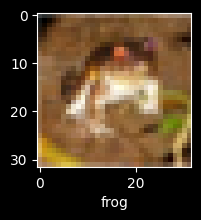

In [11]:
plt_sample(X_train, y_train, 0)

In [12]:
X_train = X_train/255
X_test = X_test / 255

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/Users/nambanumben/Code/mtech/deep-learning/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-06-15 23:54:14.223647: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-06-15 23:54:14.223751: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-15 23:54:14.223773: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-15 23:54:14.225201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-15 23:54:14.225235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFl

Epoch 1/5


2025-06-15 23:54:16.659097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2674 - loss: 2.0794
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3249 - loss: 1.9200
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2834 - loss: 2.3837
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2492 - loss: 3.3617
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2365 - loss: 4.3868


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classificaion Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classificaion Report: 
               precision    recall  f1-score   support

           0       0.53      0.14      0.22      1000
           1       0.78      0.06      0.11      1000
           2       0.24      0.27      0.25      1000
           3       0.13      0.37      0.19      1000
           4       0.00      0.00      0.00      1000
           5       0.16      0.20      0.18      1000
           6       0.39      0.11      0.17      1000
           7       0.54      0.24      0.33      1000
           8       0.21      0.56      0.30      1000
           9       0.40      0.38      0.39      1000

    accuracy                           0.23     10000
   macro avg       0.34      0.23      0.21     10000
weighted avg       0.34      0.23      0.21     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Users/nambanumben/Code/mtech/deep-learning/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer = 'adam',
            loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1321 - loss: 2.3138


[2.3151168823242188, 0.12960000336170197]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.09731928, 0.07917365, 0.08129843, 0.12847203, 0.0801281 ,
        0.10837168, 0.08711217, 0.1006777 , 0.12526077, 0.11218621],
       [0.08740745, 0.07864016, 0.08106381, 0.12954338, 0.07311561,
        0.10172044, 0.08788238, 0.09634871, 0.15033883, 0.11393922],
       [0.08755776, 0.07917646, 0.0769985 , 0.1294846 , 0.08313817,
        0.10921924, 0.09051421, 0.09415228, 0.1330751 , 0.11668375],
       [0.09391581, 0.0803025 , 0.077203  , 0.13861814, 0.07557036,
        0.1067204 , 0.08056244, 0.09389763, 0.1406775 , 0.11253215],
       [0.09038008, 0.08348099, 0.0823788 , 0.12558234, 0.0801807 ,
        0.10636207, 0.08424618, 0.100192  , 0.1323455 , 0.11485139]],
      dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 8]

'ship'

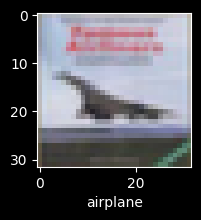

In [20]:

plt_sample(X_test, y_test,3)

classes[y_classes[3]]

classes[y_classes[3]]
